In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data = pd.read_csv("airquality.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,high
2,3,12.0,149.0,12.6,74,5,3,high
3,4,18.0,313.0,11.5,62,5,4,high
4,5,NaN,NaN,14.3,56,5,5,high
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,high
149,150,NaN,145.0,13.2,77,9,27,high
150,151,14.0,191.0,14.3,75,9,28,high
151,152,18.0,131.0,8.0,76,9,29,high


In [4]:
data.drop(data.iloc[:,[0]], axis=1, inplace=True)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,high
2,12.0,149.0,12.6,74,5,3,high
3,18.0,313.0,11.5,62,5,4,high
4,NaN,NaN,14.3,56,5,5,high
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,high
149,NaN,145.0,13.2,77,9,27,high
150,14.0,191.0,14.3,75,9,28,high
151,18.0,131.0,8.0,76,9,29,high


In [5]:
data.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
humidity     4
dtype: int64

In [6]:
data["Ozone"].fillna(data["Ozone"].mean(), inplace=True)
data["Solar.R"].fillna(data["Solar.R"].mean(), inplace=True)
data

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.00000,190.000000,7.4,67,5,1,high
1,36.00000,118.000000,8.0,72,5,2,high
2,12.00000,149.000000,12.6,74,5,3,high
3,18.00000,313.000000,11.5,62,5,4,high
4,42.12931,185.931507,14.3,56,5,5,high
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,high
149,42.12931,145.000000,13.2,77,9,27,high
150,14.00000,191.000000,14.3,75,9,28,high
151,18.00000,131.000000,8.0,76,9,29,high


In [8]:
data["humidity"].fillna("Medium", inplace=True)

In [9]:
data.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
humidity    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [13]:
data["humidity"] = le.fit_transform(data["humidity"])

In [14]:
data

,Ozone,Solar.R,Wind,Temp,Month,Day,humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,1
2,12.00000,149.000000,12.6,74,5,3,1
3,18.00000,313.000000,11.5,62,5,4,1
4,42.12931,185.931507,14.3,56,5,5,1
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,1
149,42.12931,145.000000,13.2,77,9,27,1
150,14.00000,191.000000,14.3,75,9,28,1
151,18.00000,131.000000,8.0,76,9,29,1


In [15]:
x = data[["Ozone"]]
y = data[["Temp"]]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

122
31
122
31


In [19]:
from sklearn import linear_model

In [20]:
regr = linear_model.LinearRegression()

In [21]:
model = regr.fit(x_train, y_train)
print(model.intercept_)
print(model.coef_)

[69.9585081]
[[0.1982675]]


In [22]:
y_predict = model.predict(x_test)

In [23]:
y_predict

array([[78.31138116],
       [78.31138116],
       [88.99218815],
       [72.3377181 ],
       [72.5359856 ],
       [70.1567756 ],
       [77.69094062],
       [85.81990814],
       [77.29440562],
       [78.31138116],
       [73.13078811],
       [79.87188313],
       [73.92385811],
       [76.69960312],
       [72.73425311],
       [70.7515781 ],
       [73.72559061],
       [78.31138116],
       [78.31138116],
       [72.5359856 ],
       [72.5359856 ],
       [79.27708062],
       [76.30306812],
       [82.44936063],
       [94.14714317],
       [85.42337314],
       [84.03550064],
       [74.51866061],
       [74.12212561],
       [78.31138116],
       [92.75927066]])

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_test,y_predict)
mse

71.7034019981713

In [26]:
rmse = np.sqrt(mse)
rmse

8.467786133232895

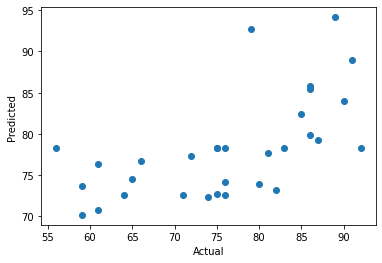

In [33]:
plt.scatter(y_test,y_predict);
plt.xlabel('Actual');
plt.ylabel('Predicted');

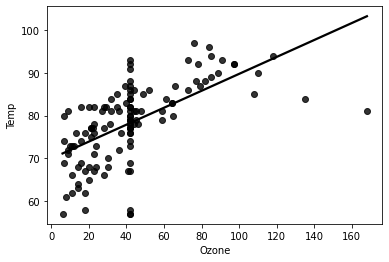

In [47]:
sns.regplot(x=x_train,y=y_train,ci=None,color ='black');